## Overview



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fraud = pd.read_csv("Fraud_Data.csv", parse_dates=['signup_time','purchase_time'])
ip = pd.read_csv("IpAddress_to_Country.csv")

display(fraud.head())
display(ip.head())

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [3]:
display(fraud.info())
display(fraud.describe())
display(ip.info())
display(ip.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB


None

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


None

,lower_bound_ip_address,upper_bound_ip_address
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


In [4]:
## Add Country info to the fraud data

countries = []
for i in range(len(fraud)):
    ip_address = fraud.loc[i, 'ip_address']
    tmp = ip[(ip['lower_bound_ip_address'] <= ip_address) &
                          (ip['upper_bound_ip_address'] >= ip_address)]
    if len(tmp) == 1:
        countries.append(tmp['country'].values[0])
    else:
        countries.append('NA')
        
fraud['country'] = countries

fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


## EDA & Feature Engineering

In [ ]:
df = fraud.copy()

In [158]:
fraud[['signup_time','purchase_time']].describe()

,signup_time,purchase_time
count,151112,151112
unique,151112,150679
top,2015-06-30 03:58:38,2015-07-17 23:22:55
freq,1,3
first,2015-01-01 00:00:42,2015-01-01 00:00:44
last,2015-08-18 04:40:29,2015-12-16 02:56:05


In [24]:
# Basically unique, consider creating a new variable: time difference between signup and first purchase

df['delta'] = (fraud['purchase_time'] - fraud['signup_time']).apply(lambda x: x.total_seconds())

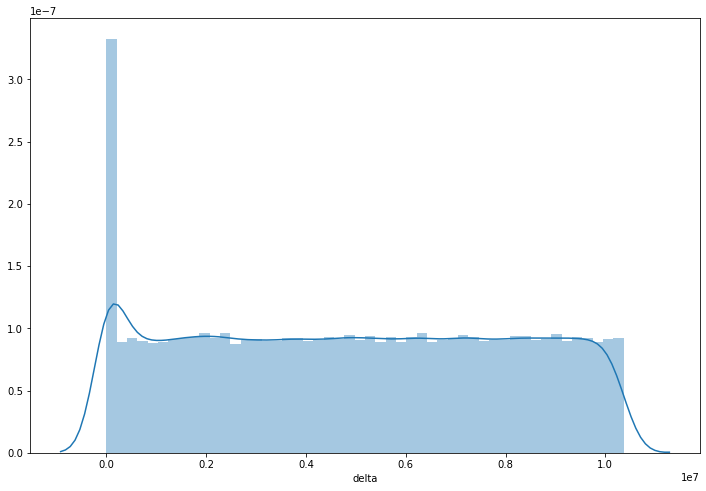

In [25]:
plt.figure(figsize=(12,8))

sns.distplot(fraud['delta'])

plt.show()

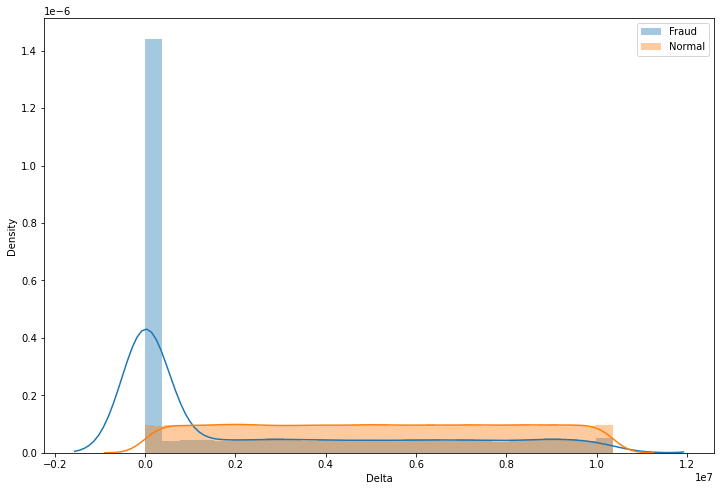

In [38]:
plt.figure(figsize=(12,8))

c1 = fraud[fraud['class']==1].copy()
c0 = fraud[fraud['class']==0].copy()

_ = sns.distplot(c1['delta'], label = 'Fraud')
_ = sns.distplot(c0['delta'], label = 'Normal')


plt.xlabel("Delta")
plt.ylabel("Density")

plt.legend()

plt.show()

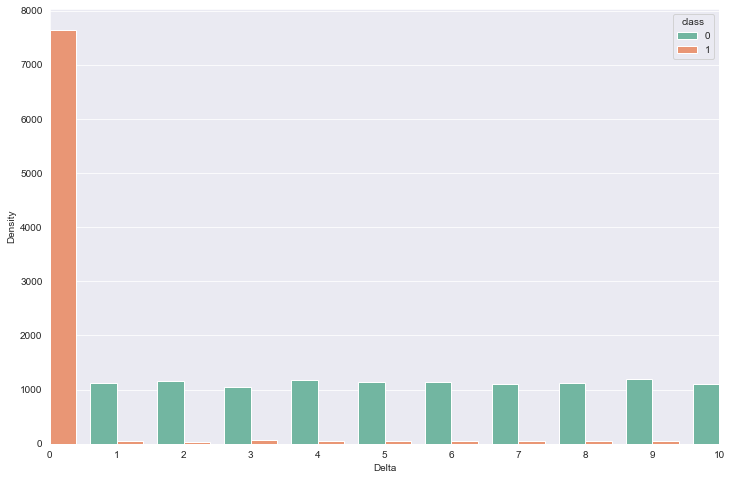

In [55]:
sns.set_style("darkgrid")

plt.figure(figsize=(12,8))

sns.countplot(x='delta_d', hue='class', data=fraud, palette='Set2')

plt.xlim(0, 10)
plt.xlabel("Delta")
plt.ylabel("Density")

plt.show()

In [172]:
df['sign_month'] = fraud['signup_time'].apply(lambda x: x.month)
df['purchase_month'] = fraud['purchase_time'].apply(lambda x: x.month)

df['sign_week'] = fraud['signup_time'].apply(lambda x: x.week)
df['purchase_week'] = fraud['purchase_time'].apply(lambda x: x.week)

df['sign_day'] = fraud['signup_time'].apply(lambda x: x.dayofweek)
df['purchase_day'] = fraud['purchase_time'].apply(lambda x: x.dayofweek)

In [56]:
# Based on the two visualization above, most of the fraud purchases happen within the first day of sign-up

**Purchase Value**

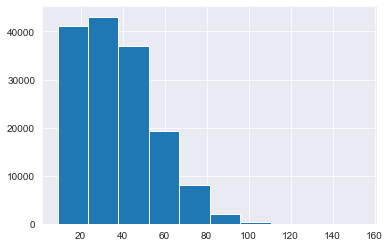

In [59]:
fraud['purchase_value'].hist()

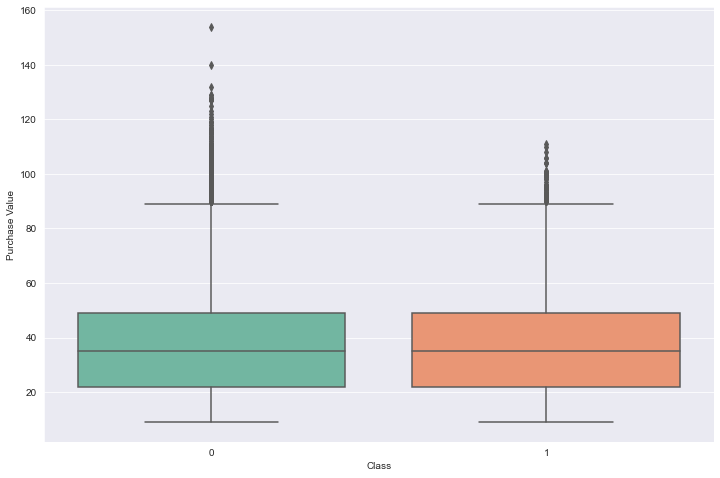

In [69]:
plt.figure(figsize=(12,8))

_ = sns.boxplot(x='class', y='purchase_value', data=fraud, palette="Set2")
# _ = sns.stripplot(x='class', y='purchase_value', data=fraud, color="orange", jitter=0.2, size=2.5)

plt.xlabel("Class")
plt.ylabel("Purchase Value")


plt.show()

In [73]:
## Seems that there're many outliers for each class. Consider set bins to this column
df = fraud.copy()
df['purchase_value'] = pd.qcut(fraud['purchase_value'],10,duplicates='drop').astype(str)

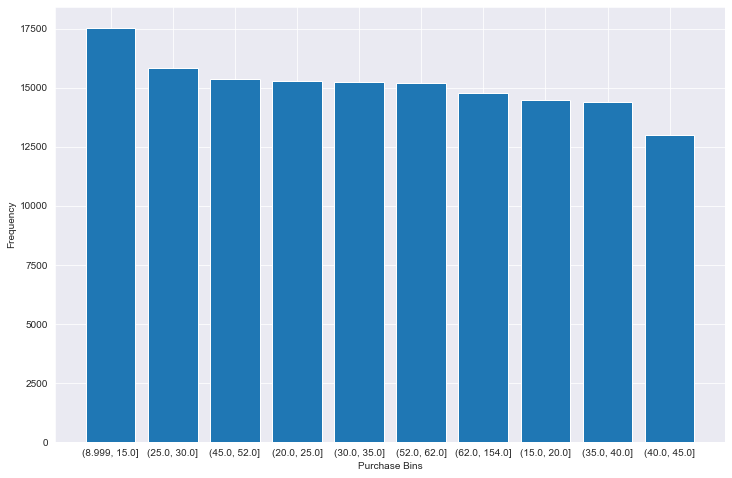

In [84]:
plt.figure(figsize=(12,8))

purchase = pd.DataFrame(df['purchase_value'].value_counts())

plt.bar(x=purchase.index, height=purchase['purchase_value'], )

plt.xlabel("Purchase Bins")
plt.ylabel("Frequency")


plt.show()

**Device**

In [86]:
fraud['device_id'].nunique()

# Highly identical. 
# Don't want to use in the machine learning model

137956

In [195]:
device_num = fraud[['user_id', 'device_id']].groupby('device_id').count().reset_index()
device_num = device_num.rename(columns={'user_id': 'device_num'})
df = df.merge(device_num, how='left', on='device_id')

In [196]:
df.drop(columns=['device_id'], inplace=True)

**Source**

In [89]:
fraud['source'].value_counts()

SEO       60615
Ads       59881
Direct    30616
Name: source, dtype: int64

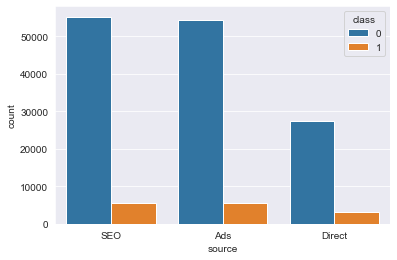

In [90]:
sns.countplot(x='source', data=fraud, hue='class')

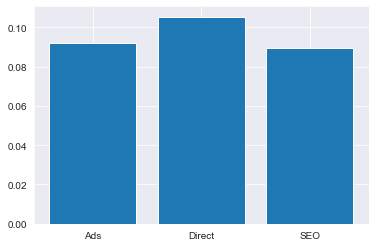

In [102]:
# percentage of fraud on different sources
fraud_per_source = fraud.groupby('source').sum()['class'] / fraud.groupby('source').count()['class']
plt.bar(fraud_per_source.index, fraud_per_source)

plt.show()

# It seems that users from direct source have a higher possibility of fraud

**Browser**

In [98]:
fraud['browser'].value_counts()

Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: browser, dtype: int64

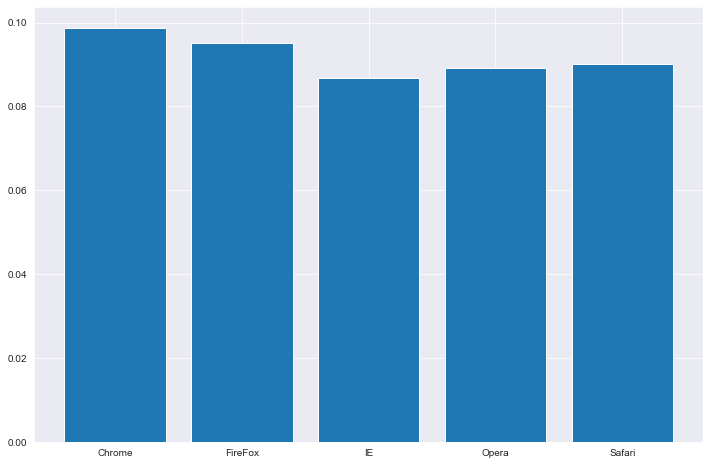

In [101]:
plt.figure(figsize=(12,8))

fraud_per_browser = fraud.groupby('browser').sum()['class'] / fraud.groupby('browser').count()['class']
plt.bar(fraud_per_browser.index, fraud_per_browser)

plt.show()

**Sex**

Quite evenly distributed among males & females.

In [104]:
fraud.groupby('sex').mean()['class']

sex
F    0.091007
M    0.095523
Name: class, dtype: float64

**Age**

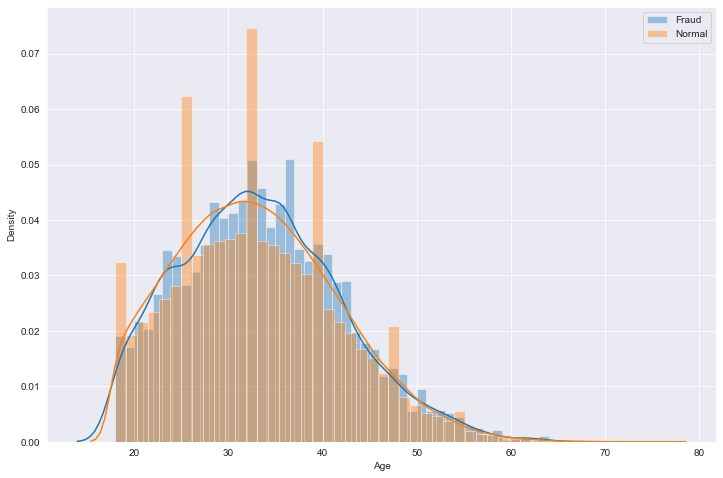

In [105]:
plt.figure(figsize=(12,8))

_ = sns.distplot(c1['age'], label = 'Fraud')
_ = sns.distplot(c0['age'], label = 'Normal')


plt.xlabel("Age")
plt.ylabel("Density")

plt.legend()

plt.show()

In [ ]:
# Set Ages to different bins

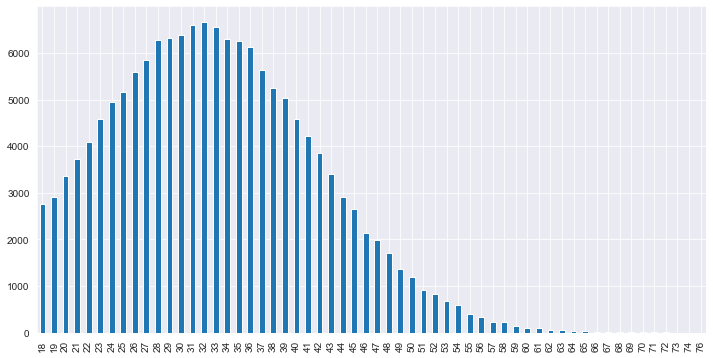

In [108]:
fraud['age'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))

In [118]:
df['age']=np.where(fraud['age']>=60, '>=60', fraud['age']).astype("str")

**country**

In [134]:
fraud['country'].value_counts()

United States     False
NA                False
China             False
Japan             False
United Kingdom    False
                  ...  
Dominica           True
South Sudan        True
Tajikistan         True
Gambia             True
Saint Martin       True
Name: country, Length: 182, dtype: bool

In [144]:
other = fraud.groupby("country").filter(lambda x: len(x) < 100)['country'].unique()
df['country'] = np.where(fraud['country'].isin(other), 'Other', fraud['country'])
df['country'].value_counts()

United States           58049
NA                      21966
China                   12038
Japan                    7306
United Kingdom           4490
                        ...  
Algeria                   122
Peru                      119
Tunisia                   118
United Arab Emirates      114
Ecuador                   106
Name: country, Length: 61, dtype: int64

In [145]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,source,browser,sex,age,ip_address,class,country,delta,delta_d
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,"(30.0, 35.0]",SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0,52
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,"(15.0, 20.0]",Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,"(8.999, 15.0]",SEO,Opera,M,53,2.621474e+09,1,United States,1.0,0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,"(40.0, 45.0]",SEO,Safari,M,41,3.840542e+09,0,NA,492085.0,5
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,"(35.0, 40.0]",Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0,50


## Machine Learning Model

In [197]:
import h2o
h2o.init()

from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.4,random_state=1234, stratify=df['class'])
df_hex = h2o.H2OFrame(df)
train_hex = h2o.H2OFrame(train)
test_hex = h2o.H2OFrame(test)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 day 8 hours 57 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,7 months and 8 days !!!
H2O_cluster_name:,H2O_from_python_chuichuider_fc5muy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.685 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [198]:
train.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'source',
       'browser', 'sex', 'age', 'ip_address', 'class', 'country', 'delta',
       'delta_d', 'sign_month', 'purchase_month', 'sign_week', 'purchase_week',
       'sign_day', 'purchase_day', 'device_num'],
      dtype='object')

In [199]:
predictors = list(train.drop(columns=['user_id', 'signup_time', 'class', 'purchase_time','ip_address']).columns)
target = 'class'

In [200]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
RF_modl = H2ORandomForestEstimator(
        model_id = 'RF_modl',
        ntrees = 100,
        nfolds=5,
        min_rows=100,
        seed=1234, categorical_encoding='auto')
RF_modl.train(predictors,target,training_frame=train_hex)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [201]:
def VarImp(model_name,m_name):
    
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    
    # plot the variable importance
    plt.rcdefaults()
    variables = model_name._model_json['output']['variable_importances']['variable']
    y_pos = np.arange(len(variables))
    fig, ax = plt.subplots(figsize = (12,12))
    scaled_importance = model_name._model_json['output']['variable_importances']['scaled_importance']
    ax.barh(y_pos,scaled_importance,align='center',color='green')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(variables)
    ax.invert_yaxis()
    ax.set_xlabel('Scaled Importance')
    ax.set_title(m_name + ' Variable Importance')
    plt.show()

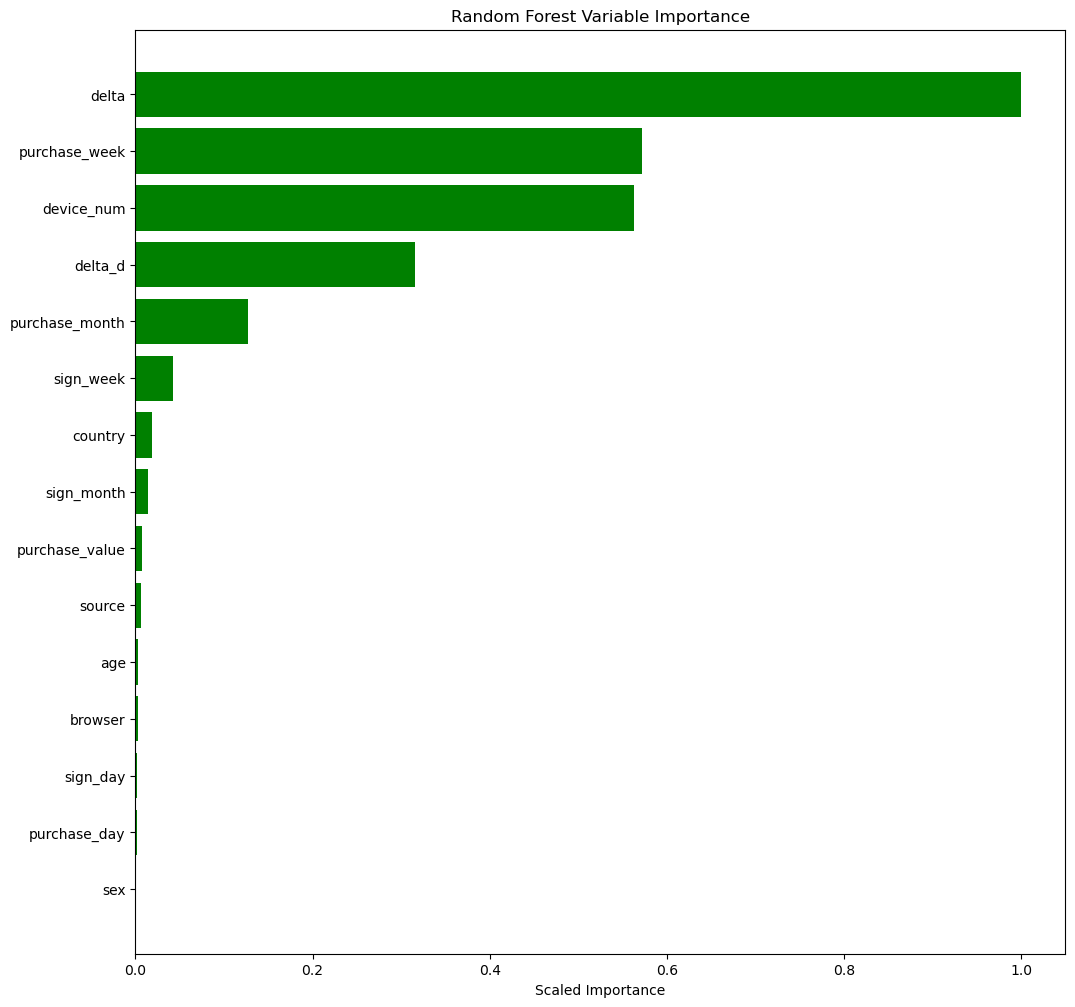

In [202]:
VarImp(RF_modl,'Random Forest')

In [203]:
def actual_predict(model,test_hex,target):
    y_pred = model.predict(test_hex).as_data_frame()
    y_actual = test_hex[target].as_data_frame()
    df_actual_predict = pd.concat([y_actual,y_pred],axis=1)
    df_actual_predict.columns = ['actual','pred']
    return(df_actual_predict)

In [204]:
RF_actual_predict = actual_predict(RF_modl,test_hex,target)
RF_actual_predict.head()

drf prediction progress: |████████████████████████████████████████████████| 100%


,actual,pred
0,0,0.024308
1,0,0.040198
2,0,0.026362
3,1,0.990053
4,0,0.030139


In [205]:
from sklearn.metrics import roc_curve,roc_auc_score, auc 
from sklearn.metrics import average_precision_score, precision_recall_curve

dd = RF_actual_predict.copy()
RF_roc_auc_value = roc_auc_score(dd['actual'],dd['pred'])
RF_roc_auc_value

0.8503261690172731

In [206]:
def ROC_PR(df_actual_predict):
    
    # ROC
    from sklearn.metrics import roc_curve,roc_auc_score, auc 
    from sklearn.metrics import average_precision_score, precision_recall_curve

    roc_auc_value = roc_auc_score(df_actual_predict['actual'],df_actual_predict['pred'])
    fpr, tpr, _ = roc_curve(df_actual_predict['actual'],df_actual_predict['pred'])
    roc_auc = auc(fpr,tpr)
    
    import matplotlib.pyplot as plt
    lw=2
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr, color='darkorange',lw=lw,label='AUC = %0.4f)' %roc_auc_value)
    plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve: AUC={0:0.4f}'.format(roc_auc_value))
    plt.legend(loc='lower right')
    
    # Precision-Recall
    plt.subplot(1,2,2)
    average_precision = average_precision_score(df_actual_predict['actual'],df_actual_predict['pred'])
    precision, recall, _ = precision_recall_curve(df_actual_predict['actual'],df_actual_predict['pred'])
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.ylim([0.0,1.05])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))

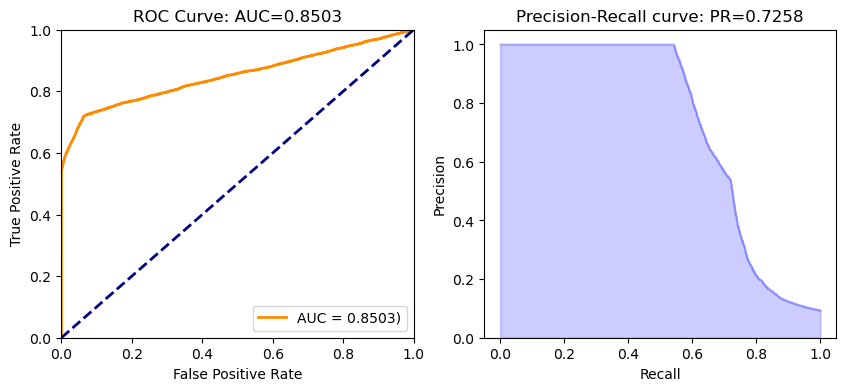

In [207]:
ROC_PR(RF_actual_predict)

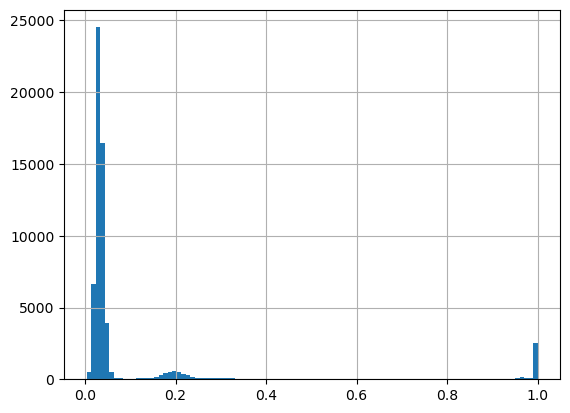

In [208]:
RF_actual_predict['pred'].hist(bins=100)

In [215]:
# 0.8 might be a good threshold
RF_actual_predict['pred_class'] = np.where(RF_actual_predict['pred']>0.9,1,0)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(RF_actual_predict['pred_class'],RF_actual_predict['actual']))
print(classification_report(RF_actual_predict['pred_class'],RF_actual_predict['actual']))

[[54785  2670]
 [    0  2990]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     57455
           1       0.53      1.00      0.69      2990

    accuracy                           0.96     60445
   macro avg       0.76      0.98      0.83     60445
weighted avg       0.98      0.96      0.96     60445



## Oversampling

In [217]:
X = train[predictors]
y = pd.DataFrame(train[target])

In [221]:
y['class'].value_counts(normalize=True)

0    0.90635
1    0.09365
Name: class, dtype: float64

In [222]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN)

In [234]:
ros = RandomOverSampler(sampling_strategy = 0.3, random_state=42)
X_rs, y_rs = ros.fit_resample(X, y)

In [235]:
y_rs['class'].value_counts()

0    82176
1    24652
Name: class, dtype: int64

In [236]:
df_over = X_rs.merge(y_rs, left_index=True, right_index=True)
df_hex = h2o.H2OFrame(df_over)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [237]:
RF_modl = H2ORandomForestEstimator(
        model_id = 'RF_modl',
        ntrees = 100,
        nfolds=5,
        min_rows=100,
        seed=1234, categorical_encoding='auto')
RF_modl.train(predictors,target,training_frame=df_hex)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [238]:
RF_actual_predict = actual_predict(RF_modl,test_hex,target)
RF_actual_predict.head()

drf prediction progress: |████████████████████████████████████████████████| 100%


,actual,pred
0,0,0.061121
1,0,0.121193
2,0,0.069859
3,1,0.997143
4,0,0.082712


In [239]:
# ROC
dd = RF_actual_predict
RF_roc_auc_value = roc_auc_score(dd['actual'],dd['pred'])
RF_roc_auc_value

0.8491026776370593

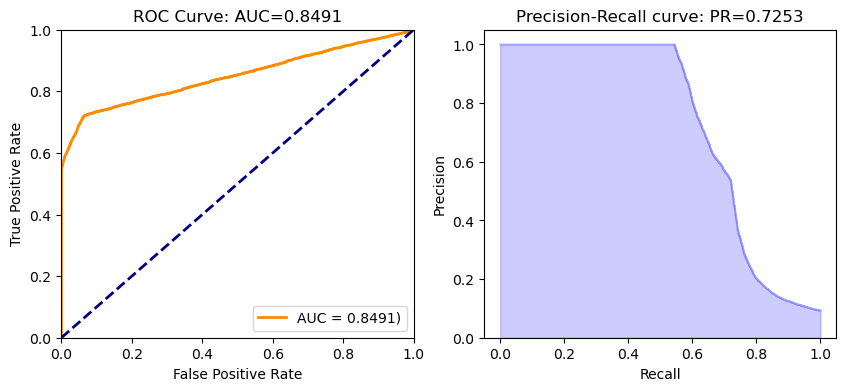

In [240]:
ROC_PR(RF_actual_predict)